## Capstone Project 2: Building a Content-Based Youtube Recommender System

## Data Cleaning & Wrangling

In [2]:
#Import modules

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Great Britain Data

In [3]:
# Import csv files as pandas data frames
gb_comments=pd.read_csv('/Users/anna/Downloads/youtube/GBcomments.csv',error_bad_lines=False)
gb_comments.shape

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


(718452, 4)

In [4]:
gb_comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [5]:
category_gb=pd.read_json('/Users/anna/Downloads/youtube-new/GB_category_id.json')
category_gb.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [6]:
category_gb['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [7]:
#extract data from the JSON file 

categories_gb={}
for row in category_gb['items']:
    cat_id=row['id']
    category=row['snippet']['title']
    categories_gb[cat_id]=category
categories_gb=pd.DataFrame.from_dict(categories_gb, orient='index').reset_index()
categories_gb.columns=['category_id','category']
categories_gb['category_id']=np.int64(categories_gb.category_id)
categories_gb.head()

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [8]:
gb_videos=pd.read_csv('/Users/anna/Downloads/youtube-new/GBvideos.csv',error_bad_lines=False)
gb_videos.shape

(38916, 16)

In [9]:
df_gb=gb_videos.merge(categories_gb, how='left',on='category_id')
df_gb[:2]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Entertainment


In [10]:
#count how many tags are included in the video


tags_gb={}
for row in df_gb.tags:
    count=len(row.split('|'))
    tags_gb[row]=count
tag_count_gb=pd.DataFrame.from_dict(tags_gb,orient='index').reset_index()
tag_count_gb.columns=['tags','tag_count']
tag_count_gb.head()

,tags,tag_count
0,"christmas|""john lewis christmas""|""john lewis""|...",9
1,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",36
2,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",6
3,"Salford City FC|""Salford City""|""Salford""|""Clas...",9
4,[none],1


In [11]:
#indicate that all of the data from this data frame is from Great Britain, so that we account for this when we merge 
#all our data

df_gb=df_gb.merge(tag_count_gb,how='left',on='tags')
df_gb['country']='GB'
df_gb[:2]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,tag_count,country
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,9,GB
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Entertainment,36,GB


In [12]:
#there are null values in the category column

df_gb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38916 entries, 0 to 38915
Data columns (total 19 columns):
video_id                  38916 non-null object
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
category                  38826 non-null object
tag_count                 38916 non-null int64
country                   38916 non-nul

Which categories have null values?

In [13]:
len(df_gb[df_gb.category.isnull()])/len(df_gb)

0.002312673450508788

Since this is just .23% of our data, we drop these videos

In [14]:
df_gb=df_gb.dropna()

### US Data

We do the same data wrangling that we did with the GB Data. First, using the file we extracted from the JSON file, we create a new column on our main US data frame (df_us) named 'category' which indicates the category the video belongs in. Next, we count how many tags each video has, and put it under the column 'tag_count'. Lastly, to account for the demographic of this data, we indicate that all these stats were from the US. 

In [15]:
us_comments=pd.read_csv('/Users/anna/Downloads/youtube/UScomments.csv',error_bad_lines=False)
us_comments.shape

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/Users/anna/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(691400, 4)

In [16]:
us_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [17]:
category_us=pd.read_json('/Users/anna/Downloads/youtube-new/US_category_id.json')
category_us.head()


,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [18]:
categories_us={}
for row in category_us['items']:
    cat_id=row['id']
    category=row['snippet']['title']
    categories_us[cat_id]=category
categories_us=pd.DataFrame.from_dict(categories_us, orient='index').reset_index()
categories_us.columns=['category_id','category']
categories_us['category_id']=np.int64(categories_us.category_id)
categories_us.head()

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [19]:
us_videos=pd.read_csv('/Users/anna/Downloads/youtube-new/USvideos.csv',error_bad_lines=False)
us_videos.shape

(40949, 16)

In [20]:
df_us=us_videos.merge(categories_us, how='left',on='category_id')
df_us[:2]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment


In [21]:
tags_us={}
for row in df_us.tags:
    count=len(row.split('|'))
    tags_us[row]=count
tag_count_us=pd.DataFrame.from_dict(tags_us,orient='index').reset_index()
tag_count_us.columns=['tags','tag_count']
tag_count_us.head()

,tags,tag_count
0,SHANtell martin,1
1,"last week tonight trump presidency|""last week ...",4
2,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",23
3,"rhett and link|""gmm""|""good mythical morning""|""...",27
4,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",14


In [22]:
df_us=df_us.merge(tag_count_us,how='left',on='tags')
df_us['country']='US'
df_us[:2]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,tag_count,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,4,US


In [23]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 19 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
category                  40949 non-null object
tag_count                 40949 non-null int64
country                   40949 non-nul

Now, we combine both data frames into one.

In [24]:
df=df_gb.append(df_us).set_index('video_id')
df[:2]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,tag_count,country
video_id,,,,,,,,,,,,,,,,,,
Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,9,GB
3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Entertainment,36,GB


More data cleaning: 

In [25]:
#the dates under the 'trending_date' column are object types that have the following format: year/day/month
#to be able to convert this data to a datetime type, we need to change the format to year/month/day

dates=[]
for date in df.trending_date:
    month=date[6:8]
    day=date[3:5]
    year=date[:2]
    x='20'+str(year+month+day)
    dates.append(x)

In [26]:
df['trending_date']=pd.to_datetime(dates)

In [27]:
df.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category', 'tag_count',
       'country'],
      dtype='object')

## Exploratory Data Analysis/Data Visualization

In this portion of the project, let's study trends within and across different video categories.

### Which categories have the most trending videos?

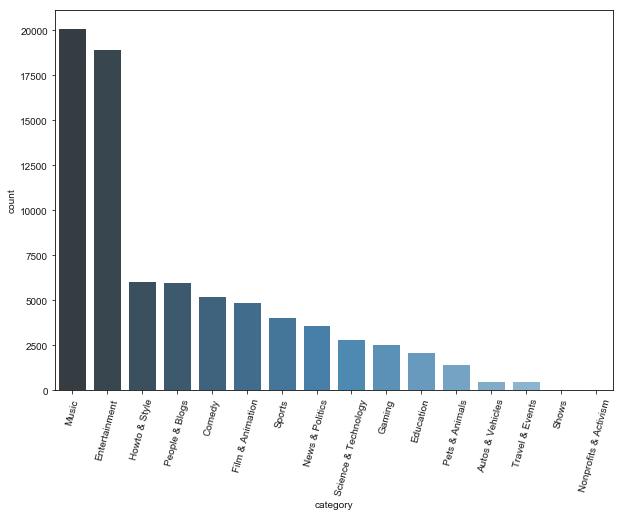

In [28]:
f, ax = plt.subplots(figsize=(10,7))
ax=sns.set(style="whitegrid")
plt.xticks(rotation=75)
ax=sns.countplot(x="category", data=df,palette=("Blues_d"),order=df['category'].value_counts().index)


### Which categories are more popular in each country?

We take the total number of videos in each category, and divide it by the total number of videos from each country. This is to address the fact that we have more videos in our US dataset.

In [29]:
gb_cat=df_gb.category.value_counts()/len(df_gb)
gb_cat=pd.DataFrame(gb_cat).reset_index()
gb_cat.columns=['category','gb_ratio']
us_cat=df_us.category.value_counts()/len(df_us)
us_cat=pd.DataFrame(us_cat).reset_index()
us_cat.columns=['category','us_ratio']
cat=gb_cat.merge(us_cat,how='left',on='category')

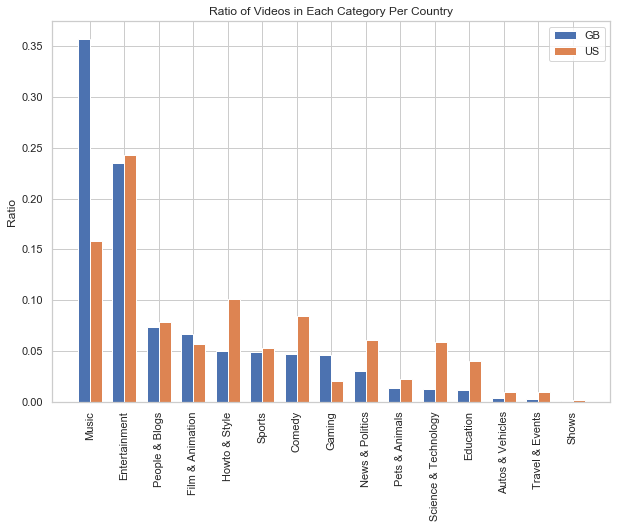

In [30]:
ind = np.arange(len(cat))  
width = 0.35  
fig, ax = plt.subplots(figsize=(10,7))
us = ax.bar(ind - width/2, np.array(cat.gb_ratio), width,
                label='GB')
gb = ax.bar(ind + width/2, np.array(cat.us_ratio), width, 
                label='US')


ax.set_ylabel('Ratio')
ax.set_title('Ratio of Videos in Each Category Per Country')
ax.set_xticks(ind)
ax.set_xticklabels(list(cat.category))
plt.xticks(rotation=90)
ax.legend()

As we can see in the graph above, a majority of the trending videos in Great Britain were music videos, while most of the trending videos in the US fell in the entertainment category. 

We see that most of the trending youtube videos in Great Britain are music videos while videos that fall in the entertainment category are most popular in the US.

### Which categories have the lowest like/dislike ratio?

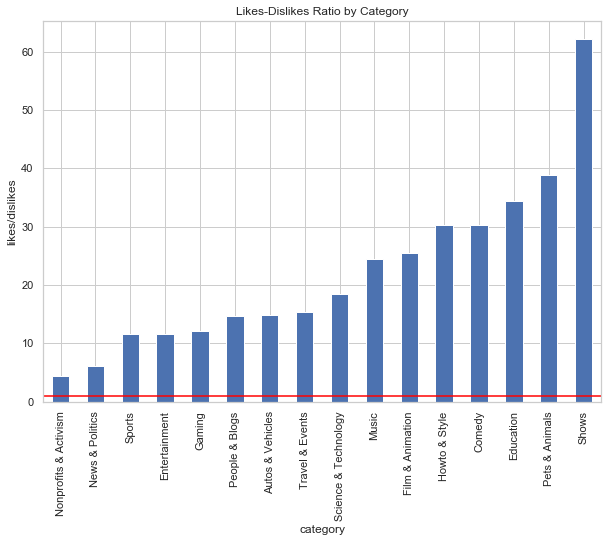

In [31]:
f, ax = plt.subplots(figsize=(10,7))
((df.groupby('category')['likes'].sum())/(df.groupby('category')['dislikes'].sum())).sort_values().plot(kind='bar')
plt.ylabel('likes/dislikes')
plt.title('Likes-Dislikes Ratio by Category')
ax.axhline(1, color="red")

We set the threshold (red line) = 1. When ratio between likes and dislikes is 1, this means that the amount of likes a video gets is equal to the dislikes it gets. As we can see, "Nonprofits & Activism" & "News & Politics" are closest to the threshold. This is understandable since these topics are often very divisive and controversial.

### Which categories usually have more comments?

Text(0,0.5,'comment count (by 10,000)')

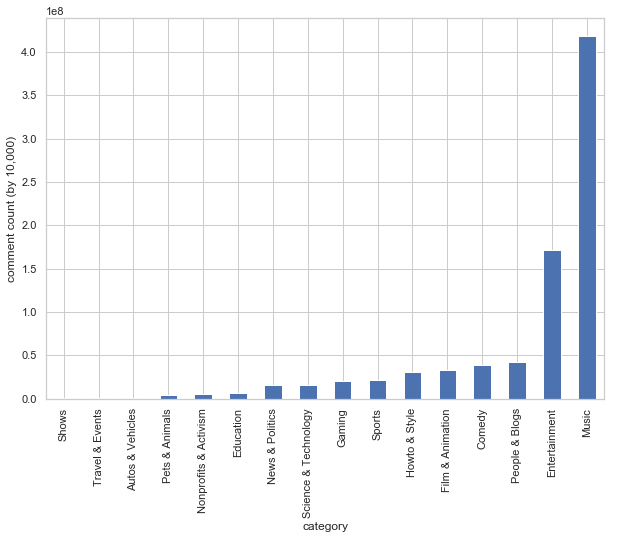

In [32]:
f, ax = plt.subplots(figsize=(10,7))
ax=sns.set(style="whitegrid")
df.groupby('category')['comment_count'].sum().sort_values().plot(kind='bar')
plt.ylabel('comment count (by 10,000)')

### Which categories usually have their comments disabled? (and do trending videos usually disable comments?)


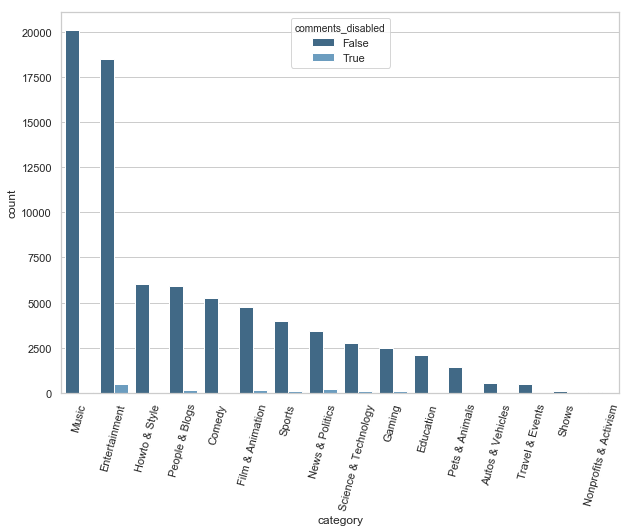

In [33]:
f, ax = plt.subplots(figsize=(10,7))
ax=sns.set(style="whitegrid")
plt.xticks(rotation=75)
ax=sns.countplot(x="category", data=df,palette=("Blues_d"),hue='comments_disabled',order=df['category'].value_counts().index)


## Which categories had the most views?

Next, we check which categories had the most views. Since the videos can be on the trending list more than once, we first figure out the latest number of views each video had the last time it was on the trending list. 

In [34]:
df[:2]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,tag_count,country
video_id,,,,,,,,,,,,,,,,,,
Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,9,GB
3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Entertainment,36,GB


In [35]:
title={}
view_count={}
last_date={}
category={}
tags_count={}
tags={}
description={}
comment_count={}
channel={}
sample=df.reset_index()

for x in set(sample.video_id):
    df2= sample[sample['video_id']==x]
    title[x]=list(df2.title)[0]
    latest=np.int(df2.views[-1:])
    view_count[x]=latest
    date=list(df2.trending_date)[-1]
    last_date[x]=date
    category[x]=list(df2.category)[0]
    tags_count[x]=list(df2.tag_count)[0]
    tags[x]=list(df2.tags)[0]
    description[x]=list(df2.description)[0]
    channel[x]=list(df2.channel_title)[0]
    latest_count=np.int(df2.comment_count[-1:])
    comment_count[x]=latest_count
 

In [36]:
title=pd.DataFrame.from_dict(title,orient='index')
view_count=pd.DataFrame.from_dict(view_count,orient='index')
last_date=pd.DataFrame.from_dict(last_date,orient='index')
category=pd.DataFrame.from_dict(category,orient='index')
tags_count=pd.DataFrame.from_dict(tags_count,orient='index')
tags=pd.DataFrame.from_dict(tags,orient='index')
description=pd.DataFrame.from_dict(description,orient='index')
comment_count=pd.DataFrame.from_dict(comment_count,orient='index')
channel=pd.DataFrame.from_dict(channel,orient='index')

In [37]:
views=(title.merge(view_count,how='left',left_index=True,right_index=True)\
            .merge(last_date,how='left',left_index=True,right_index=True))\
            .merge(category,how='left',left_index=True,right_index=True)\
            .merge(tags_count,how='left',left_index=True,right_index=True)\
            .merge(tags,how='left',left_index=True,right_index=True)\
            .merge(description,how='left',left_index=True,right_index=True)\
            .merge(comment_count,how='left',left_index=True,right_index=True)\
            .merge(channel,how='left',left_index=True,right_index=True)
views.columns=['title','views','trending_date','category','tag_count','tags','description','comment_count','channel_title']

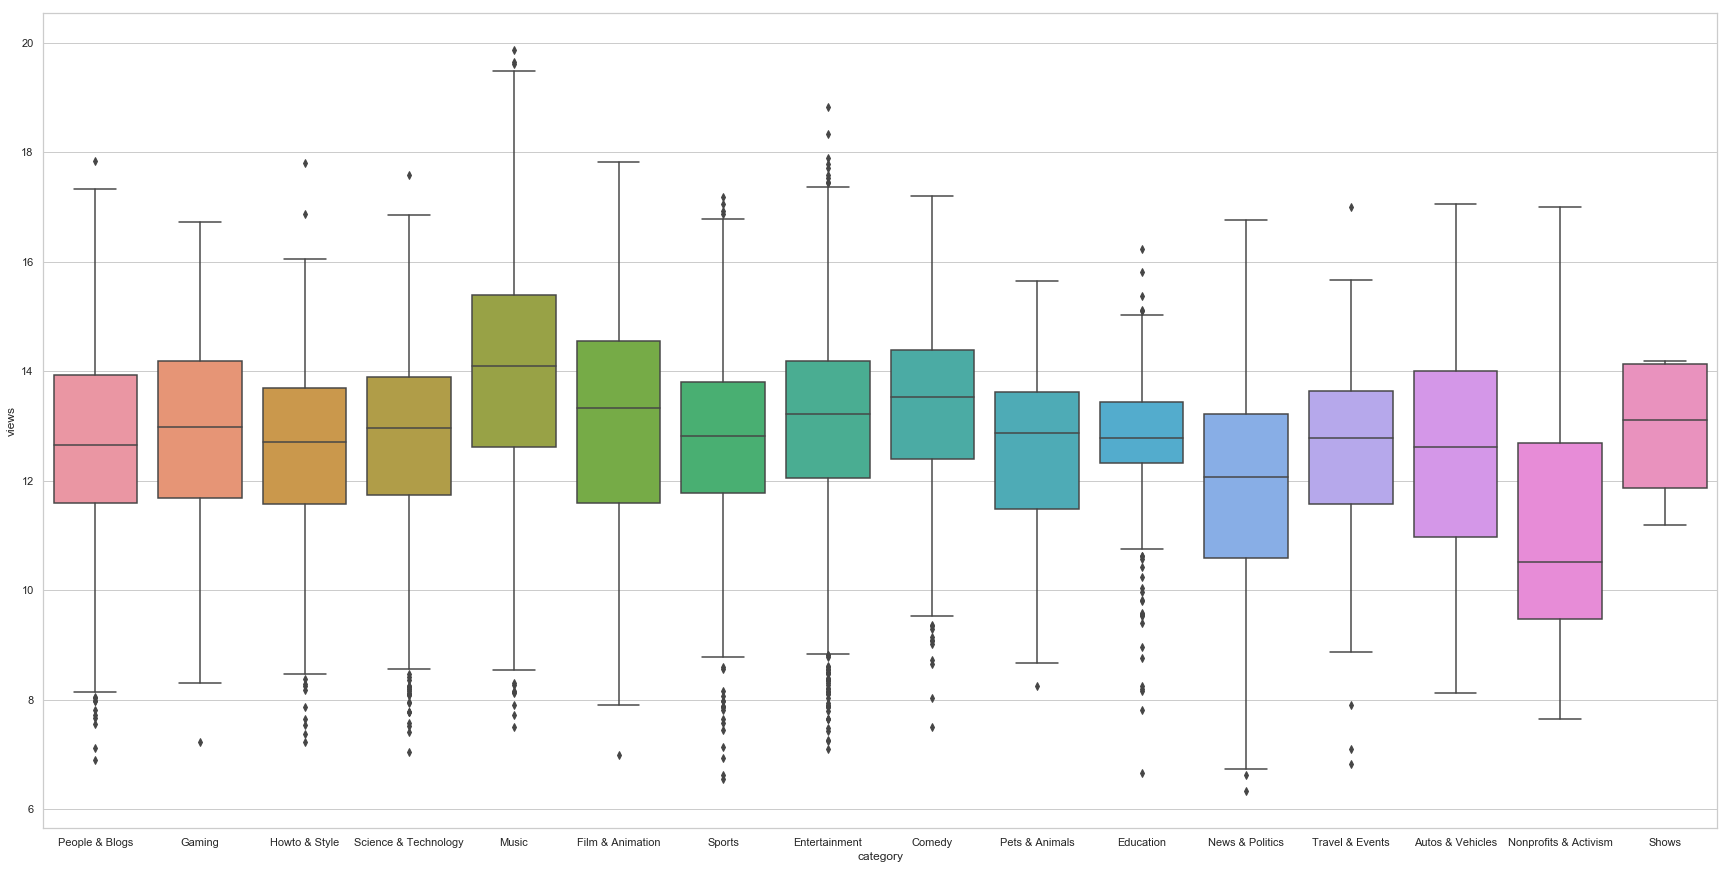

In [38]:
f, ax = plt.subplots(figsize=(30,15))
ax = sns.boxplot(x="category", y=np.log(views.views), data=views)


## Do videos with more tag counts have more views?

Text(0.5,1,'Tag Counts vs Views')

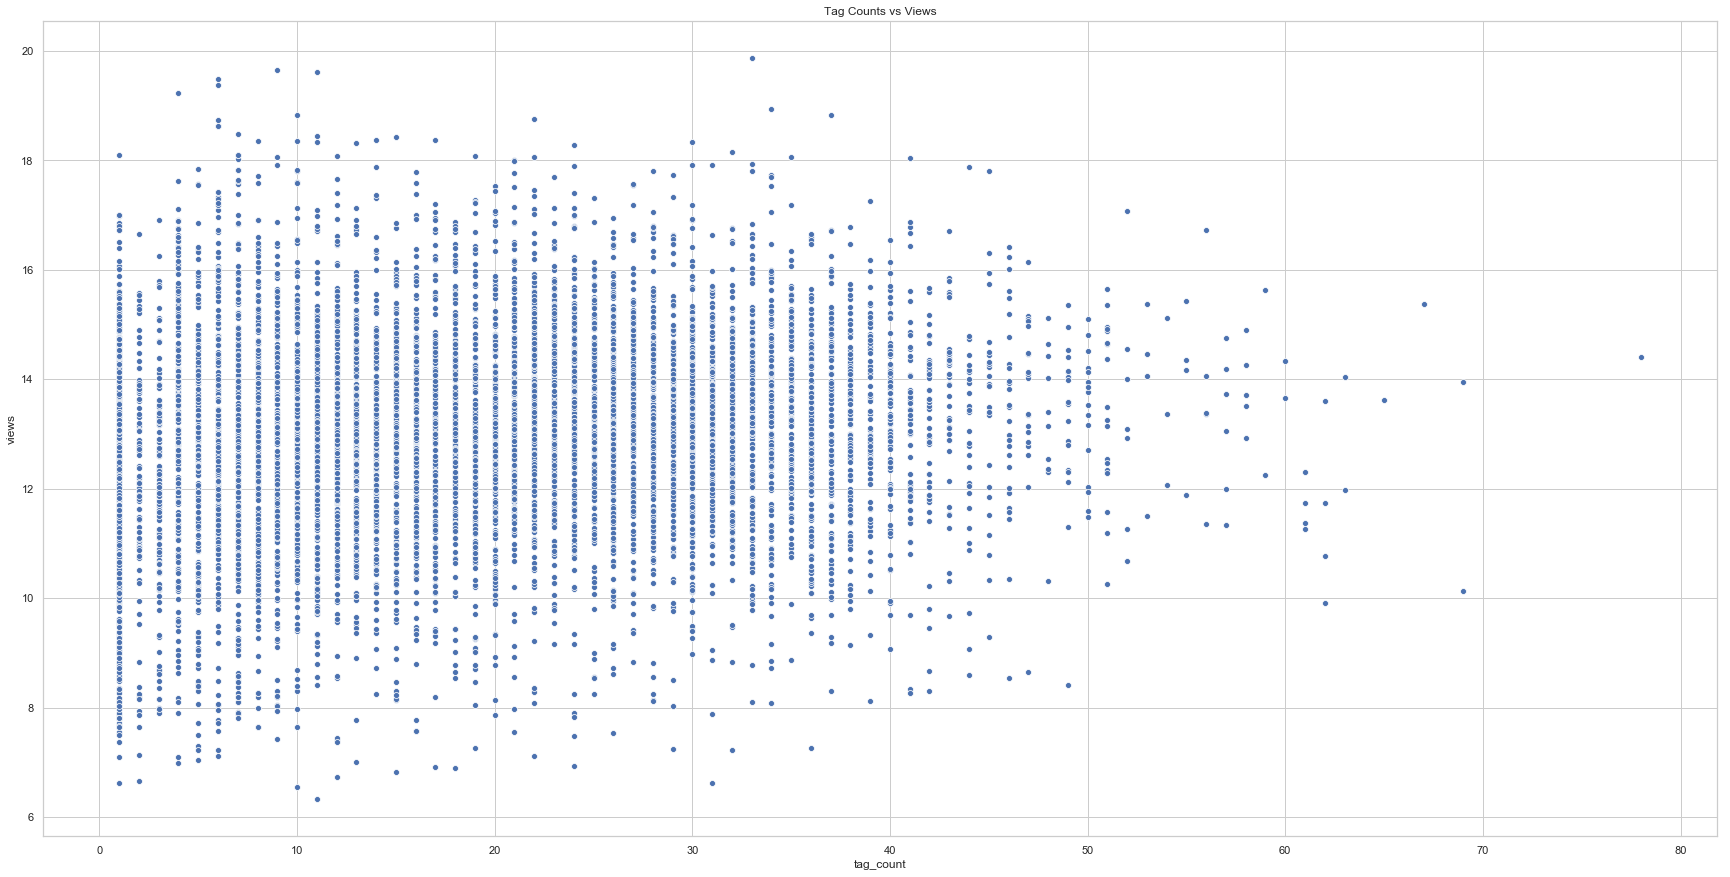

In [39]:
f, ax = plt.subplots(figsize=(30,15))
sns.scatterplot(x='tag_count',y=np.log(views.views),data=views)
plt.title('Tag Counts vs Views')

Looking at the scatter plot, there doesn't seem to be any relationship between the two.

## Which videos showed up on the trending list most often?

In [40]:
# in Great Britain:

vid_gb=df_gb[['video_id','title','category']].drop_duplicates()

top_gb=pd.DataFrame(df_gb.video_id.value_counts())
top_gb=top_gb.reset_index()
top_gb.columns=['video_id','count']
top_gb=top_gb.merge(vid_gb,how='left',on='video_id').drop_duplicates()
top_gb[:6]

,video_id,count,title,category
0,BhIEIO0vaBE,38,To Our Daughter,People & Blogs
1,2z3EUY1aXdY,38,Justin Timberlake’s FULL Pepsi Super Bowl LII ...,Sports
2,u_C4onVrr8U,38,"Miguel - Come Through and Chill ft. J. Cole, S...",Music
3,u_C4onVrr8U,38,Miguel - Come Through and Chill (Official Vide...,Music
4,Il-an3K9pjg,38,Anne-Marie - 2002 [Official Video],Music
5,NooW_RbfdWI,38,Jurassic World: Fallen Kingdom - Official Trai...,Entertainment


In Great Britain, six videos tied for trending for the most number of days. These videos were on the trending list for 38 days, with half of them belonging in the music category.

In [41]:
# in the US:

vid_us=df_us[['video_id','title','category']].drop_duplicates()

top_us=pd.DataFrame(df_us.video_id.value_counts())
top_us=top_us.reset_index()
top_us.columns=['video_id','count']
top_us=top_us.merge(vid_us,how='left',on='video_id').drop_duplicates()
top_us[:1]

,video_id,count,title,category
0,j4KvrAUjn6c,30,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Entertainment


In the US, the most number of days a video has been included in the top trending list in our data is 30. This video falls in the entertainment category.

## What tags were most used in each category?

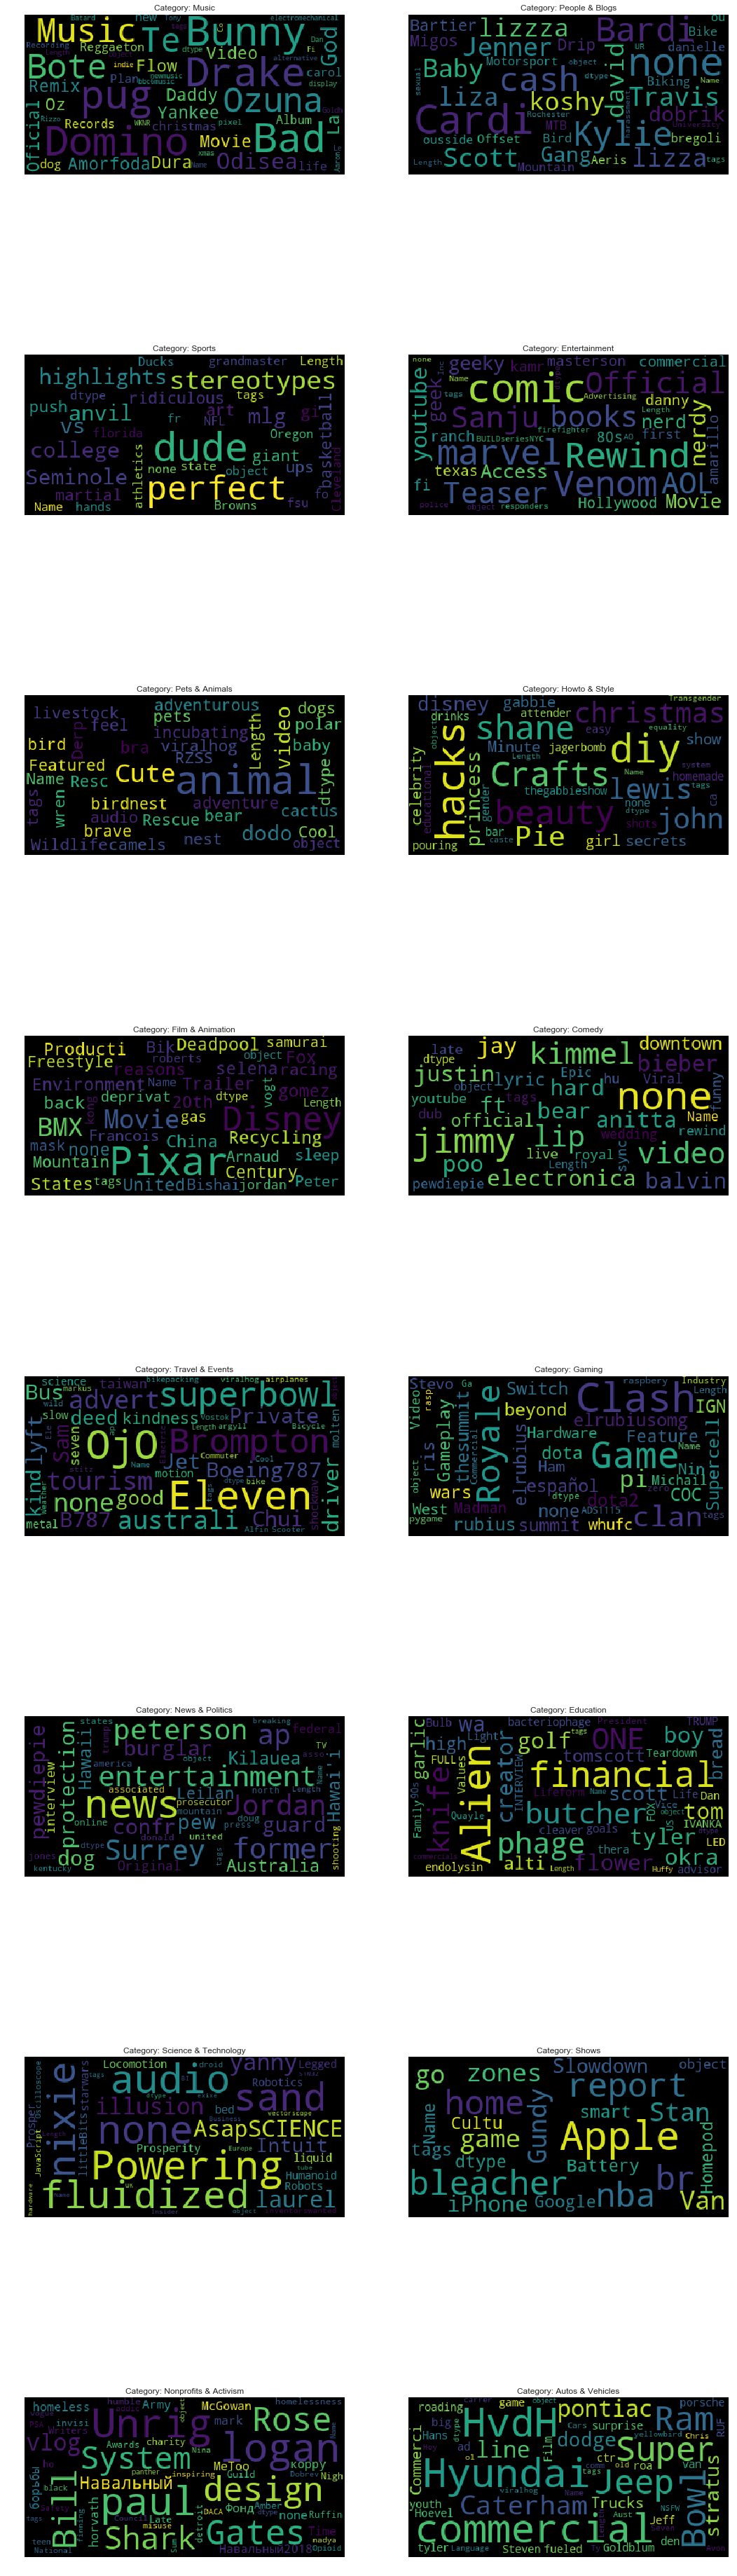

In [123]:
from wordcloud import WordCloud

df1=views.sort_values(by='views',ascending=False)
df1=df1.reset_index()

fig = plt.figure(figsize=(18, 70))
num_cols = 2
num_rows = len(set(df1.category))/num_cols
for idx, col in enumerate(set(df1.category)):
    wordcloud = WordCloud(max_font_size=50).generate(str(df1[df1['category']==col].tags))
    ax = fig.add_subplot(num_rows, num_cols, idx+1)
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set(title='Category: {0}'.format(col))
plt.show()

## Inferential Statistics

After studying trends across categories, we apply inferential statistics techniques to see if features such as the number of views, comments, likes, dislikes, and etc. are significantly different from each other. By doing so, we'll get a better idea whether or not they are an important feature in determining a category.

### Views By Category

Null Hypothesis: The number of views each category gets are not statistically different from each other.

Alternative Hypothesis: The number of views each category gets are statistically different from each other.

In [43]:
categories=list(set(df.category))

In [44]:
f_results=stats.f_oneway(np.array(views['views'][views['category']==categories[0]]),np.array(views['views'][views['category']==categories[1]]),\
                         np.array(views['views'][views['category']==categories[2]]),np.array(views['views'][views['category']==categories[3]]),\
                         np.array(views['views'][views['category']==categories[4]]),np.array(views['views'][views['category']==categories[5]]),\
                         np.array(views['views'][views['category']==categories[6]]),np.array(views['views'][views['category']==categories[7]]),\
                         np.array(views['views'][views['category']==categories[8]]),np.array(views['views'][views['category']==categories[9]]),\
                         np.array(views['views'][views['category']==categories[10]]),np.array(views['views'][views['category']==categories[11]]),\
                         np.array(views['views'][views['category']==categories[12]]),np.array(views['views'][views['category']==categories[13]]),\
                         np.array(views['views'][views['category']==categories[14]]),np.array(views['views'][views['category']==categories[15]]))

In [45]:
print('f-stat: %.5f'%f_results[0])
print('p-value:%.10f'%f_results[1])

if f_results[1]>0.05:
    print('The number of views each category gets are not statistically different from each other.')
else:
    print('The number of views each category gets are statistically different from each other.')


f-stat: 29.91229
p-value:0.0000000000
The number of views each category gets are statistically different from each other.


### Likes By Category

Null Hypothesis: The number of likes each category gets are not statistically different from each other.

Alternative Hypothesis: The number of likes each category gets are statistically different from each other.

In [46]:
f_results=stats.f_oneway(np.array(df['likes'][df['category']==categories[0]]),np.array(df['likes'][df['category']==categories[1]]),\
                         np.array(df['likes'][df['category']==categories[2]]),np.array(df['likes'][df['category']==categories[3]]),\
                         np.array(df['likes'][df['category']==categories[4]]),np.array(df['likes'][df['category']==categories[5]]),\
                         np.array(df['likes'][df['category']==categories[6]]),np.array(df['likes'][df['category']==categories[7]]),\
                         np.array(df['likes'][df['category']==categories[8]]),np.array(df['likes'][df['category']==categories[9]]),\
                         np.array(df['likes'][df['category']==categories[10]]),np.array(df['likes'][df['category']==categories[11]]),\
                         np.array(df['likes'][df['category']==categories[12]]),np.array(df['likes'][df['category']==categories[13]]),\
                         np.array(df['likes'][df['category']==categories[14]]),np.array(df['likes'][df['category']==categories[15]]))

In [47]:
print('f-stat: %.5f'%f_results[0])
print('p-value:%.10f'%f_results[1])

if f_results[1]>0.05:
    print('The number of likes each category gets are not statistically different from each other.')
else:
    print('The number of likes each category gets are statistically different from each other.')

f-stat: 544.81234
p-value:0.0000000000
The number of likes each category gets are statistically different from each other.


### Dislikes By Category

Null Hypothesis: The number of dislikes each category gets are not statistically different from each other.

Alternative Hypothesis: The number of dislikes each category gets are statistically different from each other.

In [48]:
f_results=stats.f_oneway(np.array(df['dislikes'][df['category']==categories[0]]),np.array(df['dislikes'][df['category']==categories[1]]),\
                         np.array(df['dislikes'][df['category']==categories[2]]),np.array(df['dislikes'][df['category']==categories[3]]),\
                         np.array(df['dislikes'][df['category']==categories[4]]),np.array(df['dislikes'][df['category']==categories[5]]),\
                         np.array(df['dislikes'][df['category']==categories[6]]),np.array(df['dislikes'][df['category']==categories[7]]),\
                         np.array(df['dislikes'][df['category']==categories[8]]),np.array(df['dislikes'][df['category']==categories[9]]),\
                         np.array(df['dislikes'][df['category']==categories[10]]),np.array(df['dislikes'][df['category']==categories[11]]),\
                         np.array(df['dislikes'][df['category']==categories[12]]),np.array(df['dislikes'][df['category']==categories[13]]),\
                         np.array(df['dislikes'][df['category']==categories[14]]),np.array(df['dislikes'][df['category']==categories[15]]))

In [49]:
print('f-stat: %.5f'%f_results[0])
print('p-value:%.10f'%f_results[1])

if f_results[1]>0.05:
    print('The number of dislikes each category gets are not statistically different from each other.')
else:
    print('The number of dislikes each category gets are statistically different from each other.')

f-stat: 60.05653
p-value:0.0000000000
The number of dislikes each category gets are statistically different from each other.


### Comment Count By Category

Null Hypothesis: The number of comments each category gets are not statistically different from each other.

Alternative Hypothesis: The number of comments each category gets are statistically different from each other.

In [50]:
f_results=stats.f_oneway(np.array(df['comment_count'][df['category']==categories[0]]),np.array(df['comment_count'][df['category']==categories[1]]),\
                         np.array(df['comment_count'][df['category']==categories[2]]),np.array(df['comment_count'][df['category']==categories[3]]),\
                         np.array(df['comment_count'][df['category']==categories[4]]),np.array(df['comment_count'][df['category']==categories[5]]),\
                         np.array(df['comment_count'][df['category']==categories[6]]),np.array(df['comment_count'][df['category']==categories[7]]),\
                         np.array(df['comment_count'][df['category']==categories[8]]),np.array(df['comment_count'][df['category']==categories[9]]),\
                         np.array(df['comment_count'][df['category']==categories[10]]),np.array(df['comment_count'][df['category']==categories[11]]),\
                         np.array(df['comment_count'][df['category']==categories[12]]),np.array(df['comment_count'][df['category']==categories[13]]),\
                         np.array(df['comment_count'][df['category']==categories[14]]),np.array(df['comment_count'][df['category']==categories[15]]))

In [51]:
print('f-stat: %.5f'%f_results[0])
print('p-value:%.10f'%f_results[1])

if f_results[1]>0.05:
    print('The number of comments each category gets are not statistically different from each other.')
else:
    print('The number of comments each category gets are statistically different from each other.')

f-stat: 148.42400
p-value:0.0000000000
The number of comments each category gets are statistically different from each other.


### Tag Count By Category

Null Hypothesis: The number of tags the videos in each category are not statistically different from each other.

Alternative Hypothesis: The number of tags the videos in each category are statistically different from each other.

In [52]:
f_results=stats.f_oneway(np.array(views['tag_count'][views['category']==categories[0]]),np.array(views['tag_count'][views['category']==categories[1]]),\
                         np.array(views['tag_count'][views['category']==categories[2]]),np.array(views['tag_count'][views['category']==categories[3]]),\
                         np.array(views['tag_count'][views['category']==categories[4]]),np.array(views['tag_count'][views['category']==categories[5]]),\
                         np.array(views['tag_count'][views['category']==categories[6]]),np.array(views['tag_count'][views['category']==categories[7]]),\
                         np.array(views['tag_count'][views['category']==categories[8]]),np.array(views['tag_count'][views['category']==categories[9]]),\
                         np.array(views['tag_count'][views['category']==categories[10]]),np.array(views['tag_count'][views['category']==categories[11]]),\
                         np.array(views['tag_count'][views['category']==categories[12]]),np.array(views['tag_count'][views['category']==categories[13]]),\
                         np.array(views['tag_count'][views['category']==categories[14]]),np.array(views['tag_count'][views['category']==categories[15]]))

In [53]:
print('f-stat: %.5f'%f_results[0])
print('p-value:%.10f'%f_results[1])

if f_results[1]>0.05:
    print('The number of tags the videos in each category has are not statistically different from each other.')
else:
    print('The number of tags the videos in each category has are statistically different from each other.')

f-stat: 51.10537
p-value:0.0000000000
The number of tags the videos in each category has are statistically different from each other.


In conclusion, we see that all of the differences in the videos' statistics across categories that we looked into are statistically significant. We will take this into consideration when we start building our models.

## Building the Recommender System

To make it easier to find the title you're interested in in this dataset, the function `get_title` will give you the full title of videos you might be looking for, along with their index. 

In [124]:
titles=df1.title
indices = pd.Series(df1.index,index=df1['title'])

In [125]:
def get_title(str):
    for x in df1.title:
        idx=indices[x]
        if str in x:
            print (x,idx)

While looking through the Youtube videos in our dataset, I see that Canadian rapper Drake's video for "God's Plan" is one of the videos with most views. I will use this video to test out all the recommender systems we build. First, to avoid having to type the full video title, we can just use its index.

In [126]:
get_title("God’s Plan")

Drake - God’s Plan 4


Great! The video we want to refer to is the one with index 4.

### Based on Tags Used

First, we'll try to build a recommender system based on the tags used in each video. The more tags used in common, the more likely it is to be recommended to the user.

To do this, we create a TF-IDF model. TF-IDF stands for **Term-Frequency X Inverse Document Frequency**. TF-IDF is "essentially a measure of term importance, and how discriminative a word is in a corpus". Unlike a standard ***CountVectorizer*** model, we don't just use the term frequency in a document of words in our vocabulary, we weigh its counts by 1 divided by its overall frequency. So that tags that show up often in ALL videos, are downweighted.

In [127]:
df1['video_id']=df1.index
df1=df1.drop("index",axis=1)
df1[:1]

,title,views,trending_date,category,tag_count,tags,description,comment_count,channel_title,video_id
0,Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial,424538912,2018-04-07,Music,33,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",Disponible en tu plataforma preferida:\nhttps:...,99380,NickyJamTV,0


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

#create the TF-IDF model

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df1.tags)

In [129]:
tfidf_matrix.shape

(8560, 165545)

To quantify the similarity between these vectors, we use cosine similarity. 

Calculating the Dot Product of the TF-IDF vectorizer we've created will directly give us the Cosine Similarity Score. So, instead of using sklearn's `cosine_similarities`, we can just use `linear_kernel` since it's faster.

In [130]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [131]:
cosine_sim[0]

array([1.        , 0.05601188, 0.07461076, ..., 0.        , 0.        ,
       0.        ])

In [132]:
def get_recommendations(title):
    idx = indices[title]
    sim=list(enumerate(cosine_sim[idx]))
    sim=sorted(sim, key=lambda x: x[1],reverse=True)
    sim=sim[1:21]
    vids_idx=[i[0] for i in sim]
    print ('Recommendations for "'+title+'": ')
    return df1.iloc[vids_idx][['title','channel_title','views','category','comment_count']]

In [133]:
get_recommendations(df1.title[4])

Recommendations for "Drake - God’s Plan": 


,title,channel_title,views,category,comment_count
162,Drake - God's Plan (Official Music Video),OVO Sound,19586636,Music,66540
1660,Gods Plan - Drake (William Singe Cover),William Singe,2004311,Music,3007
709,Guillermo – God's Plan,Jimmy Kimmel Live,4720264,Entertainment,3541
37,Drake - Nice For What,OVO Sound,60635812,Music,55653
6654,Drake's Dad Claps Back At Wendy Williams! He C...,Lailah Lynn,118828,Entertainment,741
3726,The epic late-night Fortnite stream featuring ...,ESPN,636473,Sports,1355
1263,DRAKE & NINJA PLAY DUOS ON FORTNITE! | Fortnit...,Twitch Moments,2663507,Gaming,1796
3068,Ninja On How Drake Made Gaming Cool,H3 Podcast Highlights,899519,People & Blogs,1921
161,Drake - I'm Upset,OVO Sound,19629105,Music,24283
534,Drake & Lil Baby - Yes Indeed (Lyrics),FutureHype,6230350,Music,2030


The recommended videos are covers of the song, Drake's other songs and videos that involve Drake (and his dad, apparently). Looks good!

Let's see how it does on other videos:

In [134]:
get_title('The End of')

The End of the F**king World | Official Trailer [HD] | Netflix 1201


In [135]:
get_recommendations(df1.title[1201])

Recommendations for "The End of the F**king World | Official Trailer [HD] | Netflix": 


,title,channel_title,views,category,comment_count
2027,THE CLOVERFIELD PARADOX | WATCH NOW | NETFLIX,Netflix,1575608,Entertainment,3032
459,The Kissing Booth | Official Trailer [HD] | Ne...,Netflix,7308023,Entertainment,5790
6508,Derren Brown: The Push I Official Trailer [HD]...,Netflix,135325,Entertainment,395
5128,Irreplaceable You | Official Trailer [HD] | Ne...,Netflix,316756,Entertainment,506
6991,The Moment George Clooney Met Amal | My Next G...,Netflix,91193,Entertainment,82
6221,Everything Sucks! | Date Announcement [HD] | N...,Netflix,165494,Entertainment,512
7197,Christmas Inheritance | Official Trailer [HD] ...,Netflix,75685,Entertainment,191
6576,A Christmas Prince | Official Trailer [HD] | N...,Netflix,128002,Entertainment,266
2840,My Next Guest Needs No Introduction With David...,Netflix,1016525,Entertainment,1625
6671,The Crown - Season 2 | Trailer: Philip [HD] | ...,Netflix,116657,Entertainment,207


For the trailer for the Netflix show, "The End of the F**king World", the top recommended videos are also trailers for other Netflix movies. 

### Recommending Videos from Different Categories

One of the disadvantages of a content-based recommender system is overspecialization--when a recommender system does not recommend items outside user's content profile. In this case, most of the videos recommended are most probably videos within the same category. To approach this, we build a recommender system that suggests similar videos (based on tag counts) that belong in different categories.

In [65]:
## different category

def rec_category(title):
    idx = indices[title]
    cat=df1.category[idx]
    sim=list(enumerate(cosine_sim[idx]))
    sim=sorted(sim, key=lambda x: x[1],reverse=True)
    vids_idx=[i[0] for i in sim]
    top=df1.iloc[vids_idx][['title','views','category','comment_count']]
    rec= top[top['category']!=cat][:20]
    print ('Recommendations for "'+title+'": ')
    return rec

Overspecialization doesn't seem much of a problem for Drake's video since the recommender system recommended videos from other categories such as Entertainment, Sports and Gaming. But what about for the Netflix trailer for "The End of the F**king World"? The videos suggested all seem to belong to the Entertainment category.

In [136]:
rec_category(df1.title[1201])

Recommendations for "The End of the F**king World | Official Trailer [HD] | Netflix": 


,title,views,category,comment_count
4072,Bright: What Went Wrong? – Wisecrack Edition,533207,Education,4618
5059,Reboot: The Guardian Code Official Trailer,326871,Film & Animation,5071
8085,'I have dad moves': Barack Obama discusses dan...,21700,News & Politics,70
2251,Ep4 It‘s on you and I | BTS: Burn the Stage,1378098,Music,1376
5194,HIS & HERS BOUJEE NIGHT OUT! VLOGMAS WEEK 1,304917,Howto & Style,1204
2225,I SPENT £308 IN PRIMARK| I CAN'T EVEN...JUST W...,1398617,Howto & Style,5765
2864,THIS HAS TO STOP! INSTAGRAM TRENDS I HATED IN ...,1005215,Howto & Style,5997
3606,"EVERYONE IS TALKING ABOUT TARTE, BUT I SPENT £...",675225,Howto & Style,3977
5673,SOMETHING TO TELL YOU! TRUTHS I LEARNT IN 2017 ad,237862,Howto & Style,1446
749,A Quiet Place (2018) - Official Teaser Trailer...,4499836,Film & Animation,2809


In [67]:
df1.tags[8392]

'aarons animals|"aarons"|"animals"|"cat"|"cats"|"kitten"|"kittens"|"prince michael"|"prince"|"michael"'

The recommender system successfully recommends videos from other categories. The first suggestion (therefore, most similar in tags), is the video "Bright: What Went Wrong? - Wisecrack Edition". This video falls under the Education category since it's a review of the Netflix show. By looking at the tags, it seems like the main similarities between the two is the fact that they are both Netflix shows. This tells us that we must incorporate something other than just tags to calculate more accurate similarities.

### Based on Description

In [140]:
tf_v = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english',lowercase=False,preprocessor=None)
tfidf = tf_v.fit_transform((df1.description.astype('str')))

In [141]:
cosine_sim2 = linear_kernel(tfidf, tfidf)

In [142]:
def rec(title):
    idx = indices[title]
    sim=list(enumerate(cosine_sim2[idx]))
    sim=sorted(sim, key=lambda x: x[1],reverse=True)
    sim=sim[1:21]
    vids_idx=[i[0] for i in sim]
    print ('Recommendations for "'+title+'": ')
    return df1.iloc[vids_idx][['title','channel_title','views','category','comment_count']]

In [145]:
rec(df1.title[4])

Recommendations for "Drake - God’s Plan": 


,title,channel_title,views,category,comment_count
156,Nicki Minaj - Barbie Tingz (Lyric Video),NickiMinajAtVEVO,20262996,Music,40235
79,Nicki Minaj - Chun-Li,NickiMinajAtVEVO,36759844,Music,93136
1086,"N.E.R.D, Rihanna - Lemon (Drake Remix - Audio)...",NERDVEVO,3126660,Music,2640
681,Nicki Minaj - Chun-Li (Live on SNL / 2018),NickiMinajAtVEVO,4945185,Music,18683
13,Post Malone - Psycho ft. Ty Dolla $ign,PostMaloneVEVO,105629911,Music,45784
4257,Drake Calls Rosenberg & Checks Him!,HOT 97,484180,Music,3008
1919,James Bay - Wild Love,JamesBayVEVO,1680396,Music,2289
409,"Hailee Steinfeld, Alesso - Let Me Go ft. Flori...",HaileeSteinfeldVEVO,8076063,Music,5863
3680,James Bay - Wild Love (Lyric Video),JamesBayVEVO,649180,Music,1436
254,"Liam Payne, Rita Ora - For You (Fifty Shades F...",FiftyShadesVEVO,13809604,Music,20933


The top recommended videos now all belong (besides the parody "Guillermo-God's Plan") to the Music category. These are all music by artists from the same genre.

In [164]:
rec(df1.title[1201])

Recommendations for "The End of the F**king World | Official Trailer [HD] | Netflix": 


,title,channel_title,views,category,comment_count
4248,Black Mirror - Crocodile | Official Trailer [H...,Netflix,486240,Entertainment,637
4492,Black Mirror - Metalhead | Official Trailer [H...,Netflix,433758,Entertainment,724
4582,Black Mirror - Hang the DJ | Official Trailer ...,Netflix,413615,Entertainment,586
4704,Black Mirror - Black Museum | Official Trailer...,Netflix,391639,Entertainment,594
1837,Black Mirror - Arkangel | Official Trailer [HD...,Netflix,1776191,Entertainment,2426
4501,The Ritual | Official Trailer [HD] | Netflix,Netflix,433149,Entertainment,938
6464,Narcos - Season 4 | Teaser [HD] I Netflix,Netflix,141000,Entertainment,546
3170,Black Mirror - Season 4 | Official Trailer [HD...,Netflix,847817,Entertainment,1639
7489,Black Mirror | Featurette: Season 4 | Netflix,Netflix,55929,Entertainment,200
2519,Black Mirror | Happy New Year | Netflix,Netflix,1189445,Entertainment,2030


Just like the recommender system based on the tags, the recommended videos for the the trailer of the Netflix show, "The End of the F**king World", are also trailers for other Netflix shows. Although, the videos suggested are completely different. 

### Based on Video Description, Tags and Video Channel

In [149]:
df1['combination']=df1['tags']+' ' + df1['description']+' '+ ((df1['channel_title']+' ')*3)

In [154]:
tfidf3 = tf_v.fit_transform(df1.combination.astype('str'))

In [155]:
cosine_sim3 = linear_kernel(tfidf3, tfidf3)

In [156]:
def recommendation(title):
    idx = indices[title]
    sim=list(enumerate(cosine_sim3[idx]))
    sim=sorted(sim, key=lambda x: x[1],reverse=True)
    sim=sim[1:21]
    vids_idx=[i[0] for i in sim]
    print ('Recommendations for "'+title+'": ')
    return df1.iloc[vids_idx][['title','channel_title','views','category','comment_count']]

In [157]:
recommendation(df1.title[4])

Recommendations for "Drake - God’s Plan": 


,title,channel_title,views,category,comment_count
1086,"N.E.R.D, Rihanna - Lemon (Drake Remix - Audio)...",NERDVEVO,3126660,Music,2640
7329,Drake Bell - Rewind,DrakeBellVEVO,65973,Music,836
156,Nicki Minaj - Barbie Tingz (Lyric Video),NickiMinajAtVEVO,20262996,Music,40235
37,Drake - Nice For What,OVO Sound,60635812,Music,55653
79,Nicki Minaj - Chun-Li,NickiMinajAtVEVO,36759844,Music,93136
709,Guillermo – God's Plan,Jimmy Kimmel Live,4720264,Entertainment,3541
4257,Drake Calls Rosenberg & Checks Him!,HOT 97,484180,Music,3008
466,Musical Genre Challenge with Ariana Grande,The Tonight Show Starring Jimmy Fallon,7172963,Comedy,14870
251,Pusha T The Story Of Adidon (Drake Diss) (WSHH...,WORLDSTARHIPHOP,14008109,Music,71318
161,Drake - I'm Upset,OVO Sound,19629105,Music,24283


In [158]:
recommendation(df1.title[1201])

Recommendations for "The End of the F**king World | Official Trailer [HD] | Netflix": 


,title,channel_title,views,category,comment_count
2027,THE CLOVERFIELD PARADOX | WATCH NOW | NETFLIX,Netflix,1575608,Entertainment,3032
4704,Black Mirror - Black Museum | Official Trailer...,Netflix,391639,Entertainment,594
4492,Black Mirror - Metalhead | Official Trailer [H...,Netflix,433758,Entertainment,724
6464,Narcos - Season 4 | Teaser [HD] I Netflix,Netflix,141000,Entertainment,546
6576,A Christmas Prince | Official Trailer [HD] | N...,Netflix,128002,Entertainment,266
7489,Black Mirror | Featurette: Season 4 | Netflix,Netflix,55929,Entertainment,200
4582,Black Mirror - Hang the DJ | Official Trailer ...,Netflix,413615,Entertainment,586
7197,Christmas Inheritance | Official Trailer [HD] ...,Netflix,75685,Entertainment,191
3600,Marvel's Jessica Jones | Date Announcement: Sh...,Netflix,678272,Entertainment,2560
6221,Everything Sucks! | Date Announcement [HD] | N...,Netflix,165494,Entertainment,512


### Conclusion

In this project, I have built four  content-based recommender systems based on different features. For the first two, we focus on the tags used in each video. For the second one, I only allow for recommendations outside the category. We see that this does not do very well because the videos don’t seem to be very similar, except for the fact that they had very broad tags (such as “Netflix”) in common. For the third one, we focus solely on the description. This can be more helpful for show or movie trailers since actors, directors and plots are often included in the description. Although, there is a higher chance of videos with little to no description will be paired with unrelated videos. So, for our fourth recommender system, we try to address all of these problems by combining the tags used, description, and channel title all in one string. 
